In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm


In [3]:
df = pd.read_csv("Heart Desase.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df = df.drop(columns=['education','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp'])
df

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
persentase_data_kosong= df.isna().sum()*100/len(df)
nilaikosong_df= pd.DataFrame({'Persentase Data Kosong' : persentase_data_kosong})
nilaikosong_df

,Persentase Data Kosong
male,0.000000
age,0.000000
currentSmoker,0.000000
diabetes,0.000000
totChol,1.179245
sysBP,0.000000
diaBP,0.000000
BMI,0.448113
heartRate,0.023585
glucose,9.150943


In [8]:
df=df.dropna()
df

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4237,0,52,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0,185.0,141.0,98.0,25.60,67.0,72.0,0


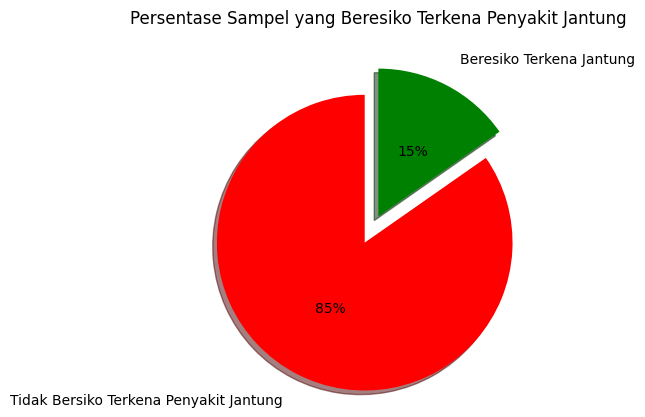

In [9]:
index_CHD = df.index[df['TenYearCHD']==1]

y=np.array([df['TenYearCHD'].value_counts()[0],df['TenYearCHD'].value_counts()[1]])
mylabels = ["Tidak Bersiko Terkena Penyakit Jantung","Beresiko Terkena Jantung"]
mycolors = ["red","green"]
myexplode = [0.2, 0]

plt.title('Persentase Sampel yang Beresiko Terkena Penyakit Jantung')
plt.pie (y, labels = mylabels, colors = mycolors, autopct = '%1.0f%%', pctdistance=0.5,
         labeldistance=1.2, shadow=True, startangle=90,explode=myexplode)
plt.show()

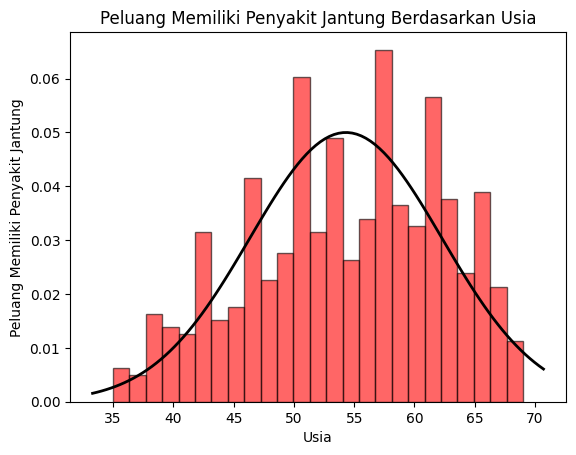

In [10]:
TYCHD1 = df.loc[index_CHD]

plt.hist(TYCHD1['age'], facecolor= 'red', bins=25, alpha=0.6, edgecolor='black', linewidth=1, density=True)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x, np.mean(TYCHD1['age']), np.std(TYCHD1['age']))
plt.plot (x, p, 'k', linewidth = 2)
plt.title('Peluang Memiliki Penyakit Jantung Berdasarkan Usia')
plt.xlabel("Usia")
plt.ylabel("Peluang Memiliki Penyakit Jantung")
plt.show()

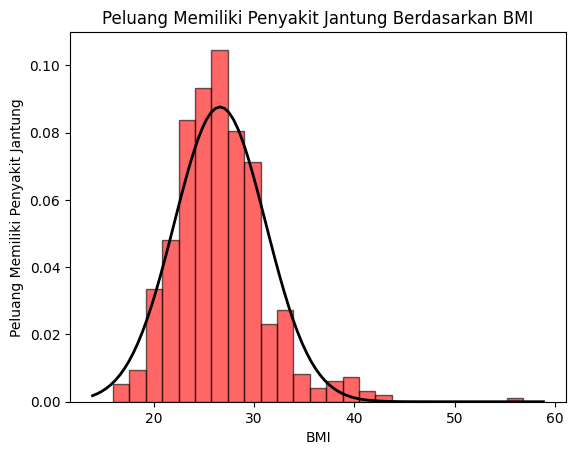

In [11]:
plt.hist(TYCHD1['BMI'], facecolor= 'red', bins=25, alpha=0.6, edgecolor='black', linewidth=1, density=True)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x, np.mean(TYCHD1['BMI']), np.std(TYCHD1['BMI']))
plt.plot (x, p, 'k', linewidth = 2)
plt.title('Peluang Memiliki Penyakit Jantung Berdasarkan BMI')
plt.xlabel("BMI")
plt.ylabel("Peluang Memiliki Penyakit Jantung")
plt.show()


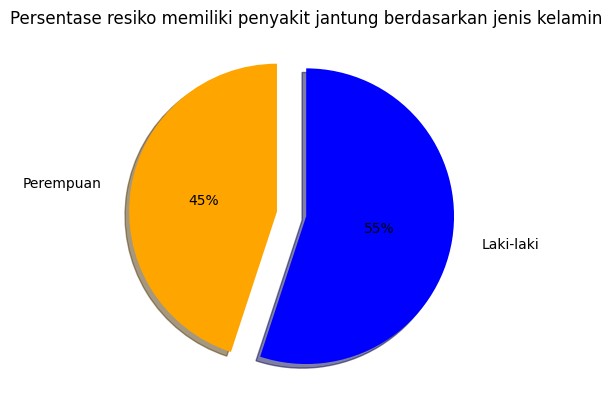

In [12]:
y = np.array([TYCHD1['male'].value_counts()[0], TYCHD1['male'].value_counts()[1]])
mylabels = ["Perempuan","Laki-laki"]
mycolors = ["orange","blue"]
myexplode = [0.2, 0]

plt.title('Persentase resiko memiliki penyakit jantung berdasarkan jenis kelamin')
plt.pie (y, labels = mylabels, colors= mycolors, autopct='%1.0f%%', pctdistance=0.5,
         labeldistance=1.2, shadow=True, startangle=90, explode= myexplode)
plt.show()

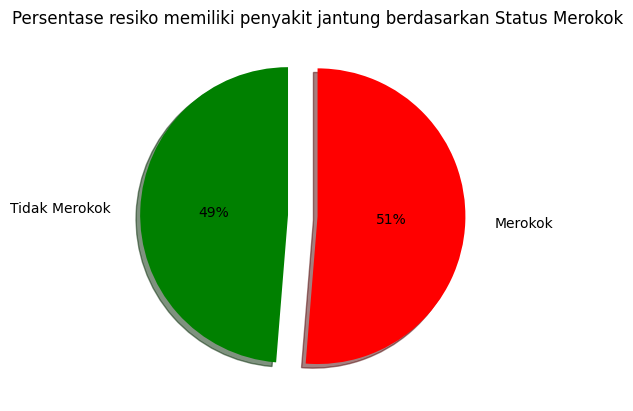

In [13]:
y = np.array([TYCHD1['currentSmoker'].value_counts()[0], TYCHD1['currentSmoker'].value_counts()[1]])
mylabels = ["Tidak Merokok","Merokok"]
mycolors = ["green","red"]
myexplode = [0.2, 0]

plt.title('Persentase resiko memiliki penyakit jantung berdasarkan Status Merokok')
plt.pie (y, labels = mylabels, colors= mycolors, autopct='%1.0f%%', pctdistance=0.5,
         labeldistance=1.2, shadow=True, startangle=90, explode= myexplode)
plt.show()

In [14]:
S1 = df.loc[df['currentSmoker']==1]
S0 = df.loc[df['currentSmoker']==0]

S1D1 = S1.loc[S1['diabetes']==1]
S1D0 = S1.loc[S1['diabetes']==0]
S0D1 = S0.loc[S0['diabetes']==1]
S0D0 = S0.loc[S0['diabetes']==0]

S1D1TYCHD1 = S1D1.loc[S1D1['TenYearCHD']==1]
S1D1TYCHD0 = S1D1.loc[S1D1['TenYearCHD']==0]
S1D0TYCHD1 = S1D0.loc[S1D0['TenYearCHD']==1]
S1D0TYCHD0 = S1D0.loc[S1D0['TenYearCHD']==0]



S0D1TYCHD1 = S0D1.loc[S0D1['TenYearCHD']==1]
S0D1TYCHD0 = S0D1.loc[S0D1['TenYearCHD']==0]
S0D0TYCHD1 = S0D0.loc[S0D0['TenYearCHD']==1]
S0D0TYCHD0 = S0D0.loc[S0D0['TenYearCHD']==0]
#print (S0D0TYCHD1)

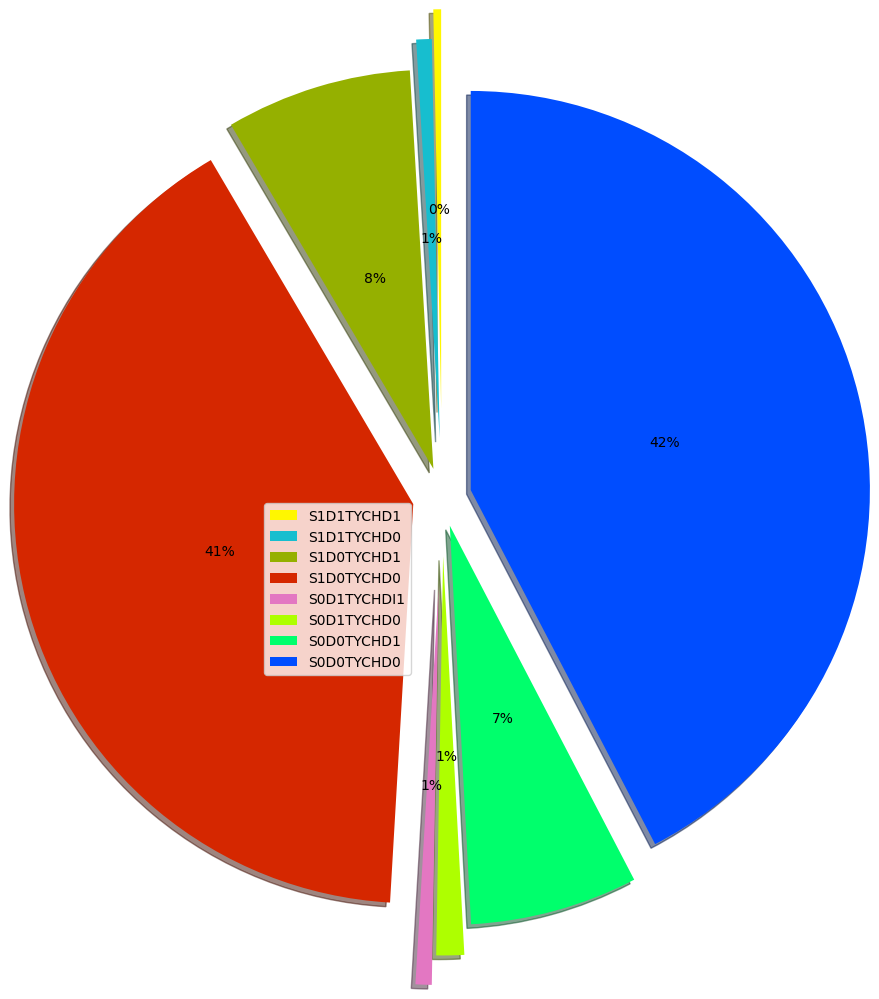

In [16]:
y = np.array ([S1D1['TenYearCHD'].value_counts()[1],S1D1['TenYearCHD'].value_counts()[0],
              S1D0['TenYearCHD'].value_counts()[1],S1D0['TenYearCHD'].value_counts()[0],
              S0D1['TenYearCHD'].value_counts()[1],S0D1['TenYearCHD'].value_counts()[0],
              S0D0['TenYearCHD'].value_counts()[1],S0D0['TenYearCHD'].value_counts()[0]])

mylabels = ["S1D1TYCHD1","S1D1TYCHD0","S1D0TYCHD1","S1D0TYCHD0","S0D1TYCHDI1",
            "S0D1TYCHD0","S0D0TYCHD1","S0D0TYCHD0"]
mycolors = ["#FFF700", "#17becf", "#95B000", "#D52700", "#e377c2", "#AEFF00", "#00FF6C", "#004DFF"]
myexplode = [0.6, 0.4, 0.2, 0.2, 0.6, 0.4, 0.2, 0.2]

#plt.title('Persentase resiko memiliki penyakit jantung berdasarkan Status Merokok dan Riwayat Diabetes')
plt.pie (y, colors= mycolors, autopct='%1.f%%', pctdistance=0.5, labeldistance=1.2,
         shadow=True, radius=2.7, startangle = 90, explode = myexplode)
plt.legend(mylabels, loc='lower left')
plt.show()